In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,56.002438,1.869655,12.054433,17.348400,23.499514
1,47.952051,1.051044,9.095810,29.553916,20.816503
2,58.735730,16.116328,10.323362,10.074456,17.843810
3,49.385281,12.859108,8.144563,4.175940,25.965243
4,35.654416,3.192454,7.408031,-2.233882,22.229407


<AxesSubplot:ylabel='Density'>

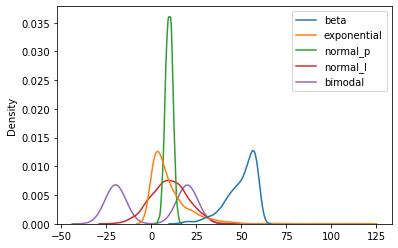

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.036608,10.097706,9.976536,10.115246,0.172514
std,8.495598,10.506379,1.987738,10.039744,20.195837
min,16.382231,0.021234,4.085260,-21.279460,-28.597197
25%,45.441104,2.886250,8.548483,3.195543,-19.867067
50%,52.359621,6.782441,10.003907,10.038962,0.760937
75%,56.720147,13.970791,11.367944,16.891418,20.119489
max,59.992257,117.234842,15.530059,44.357766,29.214054


<AxesSubplot:ylabel='Density'>

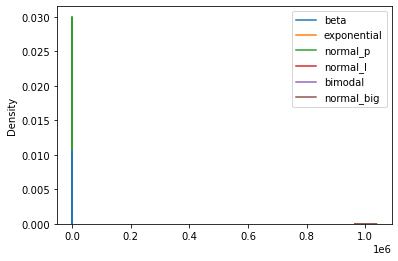

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

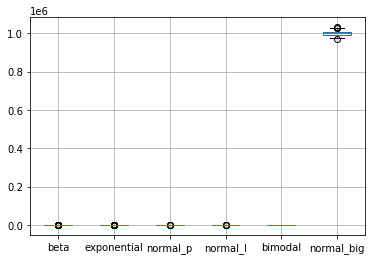

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.322972,-0.443211,0.727276,0.533696,0.568656,-0.390677
1,-0.390775,-0.517062,-0.322082,1.424878,0.501558,0.133582
2,0.565306,0.842063,0.113304,0.002592,0.427215,0.646037
3,-0.263705,0.548211,-0.659468,-0.428087,0.630320,-0.090744
4,-1.481084,-0.323873,-0.920699,-0.896098,0.536892,1.285361


<AxesSubplot:ylabel='Density'>

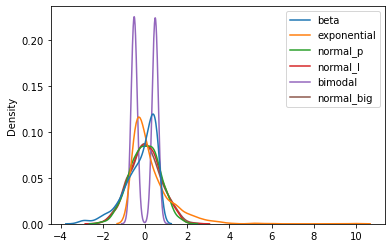

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.205958,0.299089,-0.009708,0.005570,-0.014716,0.002798
std,0.753220,0.947841,0.705006,0.733049,0.505066,0.757819
min,-3.189756,-0.609967,-2.099212,-2.286705,-0.734200,-2.215640
25%,-0.613396,-0.351498,-0.516206,-0.499670,-0.515873,-0.504498
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.386604,0.648502,0.483794,0.500330,0.484127,0.495502
max,0.676709,9.964544,1.960003,2.505777,0.711567,2.400183


<AxesSubplot:>

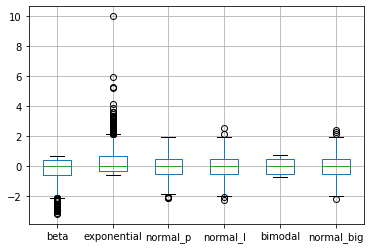

In [14]:
df_s.boxplot()

In [15]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.189755618235165,
 -0.6099671849022065,
 -2.0992120828066185,
 -2.2867048274480917,
 -0.7342001167594268,
 -2.2156398938653448]

In [16]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6767094926392349,
 9.964543886428803,
 1.9600031838001966,
 2.5057767424992567,
 0.7115670862239089,
 2.400182656499413]

In [17]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.23596211e+01, 6.78244103e+00, 1.00039067e+01, 1.00389619e+01,
       7.60936625e-01, 1.00001194e+06])